In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
path = '/var/autofs/misc/home/danielr/Downloads/AppliedMachineLearning/ml-25m'

data = np.loadtxt(f'{path}//ratings.csv', skiprows=1, delimiter = ',')[:,:3]

data[:5]

array([[  1. , 296. ,   5. ],
       [  1. , 306. ,   3.5],
       [  1. , 307. ,   5. ],
       [  1. , 665. ,   5. ],
       [  1. , 899. ,   3.5]])

In [3]:
print(f'numbers of users: {len(set(data[:,0]))}')
print(f'numbers of movies: {len(set(data[:,1]))}')
len(data)

numbers of users: 162541
numbers of movies: 59047


25000095

### SPARSE TRAIN - TEST DATA

In [4]:
def get_sparse(data, train_size = 0.9):
    '''get sparse train and test data'''
    #Shuffle the data
    np.random.shuffle(data)

    split_point = train_size * len(data)
    
    #initialize all the data structure
    # mapping from user to index
    map_user_to_index = {}
    map_index_to_user = []

    # mapping from movie to index
    map_movie_to_index = {}
    map_index_to_movie = []
    
    # First build the mappings.
    for user, movie, _ in data:
        #Take care of the user data structure
        if user not in map_user_to_index:
            map_user_to_index[user] = len(map_index_to_user)
            map_index_to_user.append(user)
            
            
        #Take care of the movie data structure
        if movie not in map_movie_to_index:
            map_movie_to_index[movie]=len(map_index_to_movie)
            map_index_to_movie.append(movie)
  
    #Initialize with empty list all the trainings data.
    data_by_user_train = [[] for i in range(len(map_index_to_user))]
    data_by_movie_train = [[] for i in range(len(map_index_to_movie))]
    
    #Initialize with empty list all the test data.
    data_by_user_test = [[] for i in range(len(map_index_to_user))]
    data_by_movie_test = [[] for i in range(len(map_index_to_movie))]

    #create all the data structure using in a loop
    for index, (user, movie, rating) in enumerate(data):
        user_id = map_user_to_index[user]
        movie_id = map_movie_to_index[movie]
        if index < split_point:
            # Insert into the sparse user and item training matrices.
            data_by_user_train[user_id].append((movie_id, float(rating)))
            data_by_movie_train[movie_id].append((user_id, float(rating)))
        else:
            # Insert into the sparse user and item test matrices.
            data_by_user_test[user_id].append((movie_id, float(rating)))
            data_by_movie_test[movie_id].append((user_id,float(rating)))
            
    return map_user_to_index,map_index_to_user,map_movie_to_index,map_index_to_movie,\
data_by_user_train,data_by_movie_train,data_by_user_test,data_by_movie_test


In [5]:
map_user_to_index,map_index_to_user,map_movie_to_index,map_index_to_movie,\
data_by_user_train,data_by_movie_train,data_by_user_test,data_by_movie_test = get_sparse(data)

In [6]:
def plot_power_law(data_by_user, data_by_movie):
    """plot the power law of users and power law of movies"""
    
    # get the number of movie watched by each user
    number_of_rating_by_user = [len(user) for user in data_by_user]
    
    # create the histogram of number_of_rating_by_user
    count_occurences_by_user = np.bincount(number_of_rating_by_user)
    
    # get the number of movie watched by each user
    number_of_rating_by_movie = [len(movie) for movie in data_by_movie]
    
    # create the histogram of number_of_rating_by_user
    count_occurences_by_movie = np.bincount(number_of_rating_by_movie)
    
    # plot
    sns.set_style("whitegrid")
    plt.scatter(x = range(len(count_occurences_by_user)), y = count_occurences_by_user, label = 'user', color = 'black')
    plt.scatter(x = range(len(count_occurences_by_movie)), y = count_occurences_by_movie, label = 'movie', color = 'green')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Number of ratings")
    plt.ylabel("Frequences")
    plt.title('Power law for users & movies')
    plt.savefig("powerlaw.pdf", format="pdf")
    
    

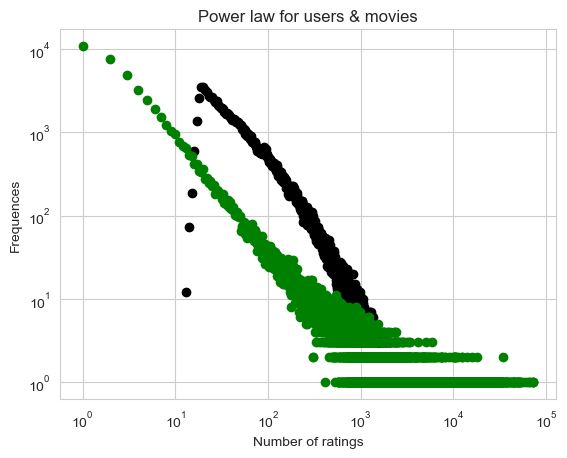

In [7]:
plot_power_law(data_by_user_train, data_by_movie_train)

In [8]:
import pickle
def save_data(path, names, data):
    folder_path = path
    # Check if the folder exists, and if not, create it
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for name, value in zip(names, data):
        print(f'saving file: {name}')
        with open(f'{path}/{name}.pickle', 'wb') as handle:
            pickle.dump(value, handle, protocol=pickle.HIGHEST_PROTOCOL)

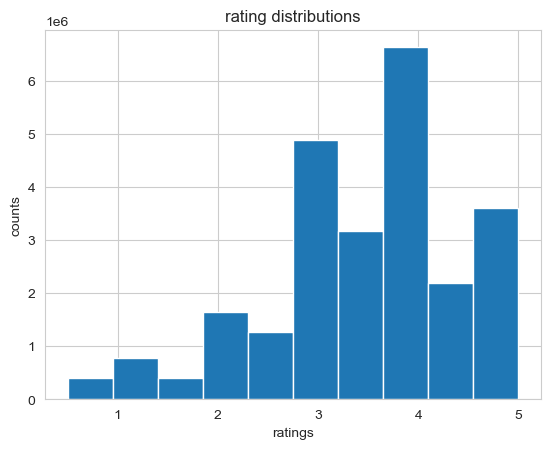

In [9]:
plt.hist(x  = data[:, 2])
plt.title('rating distributions')
plt.xlabel("ratings")
plt.ylabel("counts")
plt.savefig("ratingdistributions.pdf", format="pdf")

### Save Train

In [37]:
names = ('map_user_to_index','map_index_to_user','map_movie_to_index','map_index_to_movie',\
'data_by_user_train','data_by_movie_train','data_by_user_test','data_by_movie_test', 'movies_to_plot', 'map_id_movies')
value = get_sparse(data) + (movies_to_plot, map_id_movies)
save_data('results//', names, value)

saving file: map_user_to_index
saving file: map_index_to_user
saving file: map_movie_to_index
saving file: map_index_to_movie
saving file: data_by_user_train
saving file: data_by_movie_train
saving file: data_by_user_test
saving file: data_by_movie_test
saving file: movies_to_plot
saving file: map_id_movies
